In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
from datetime import datetime, timedelta

In [4]:
from datetime import date
from monthdelta import MonthDelta


ImportError: cannot import name 'MonthDelta'

In [5]:
import pandas as pd
#excel_file = 'bookings_model.xlsx'
#bookings = pd.read_excel(excel_file)

bookings = pd.read_excel('bookings_model.xlsx', sheet_name='Old')


In [6]:
bookings.head()

,partner_name,booking_month,booking_amt_month,MONTH_CERTIFICATE_EARNED,total_certs,running_certs_total,reg_month,exam_month,CAs_monthly,DEs_monthly,...,partner_id,PROGRAMMARKET,partner_region,contract_age,contract_within_6months,contract_within_7months,months_remaining_incontract,months_remaining_FASTTRACK_eligibility,Google Entity,PSM
0,"8K Miles Software Services, Inc.",2018-05-01,498.39,NaT,0,0,NaT,NaT,0,0,...,a0n6000000659EjAAI,DEVELOPED MARKET,AMER,3,True,True,2,3,NaN,Jack Lockhart
1,"8K Miles Software Services, Inc.",2018-06-01,8721.45,2018-06-01,1,1,NaT,NaT,0,0,...,a0n6000000659EjAAI,DEVELOPED MARKET,AMER,3,True,True,2,3,NaN,Jack Lockhart
2,"8K Miles Software Services, Inc.",2018-07-01,3299.40,NaT,0,1,NaT,NaT,0,0,...,a0n6000000659EjAAI,DEVELOPED MARKET,AMER,3,True,True,2,3,NaN,Jack Lockhart
3,ADDO AI,2018-04-01,0.00,2018-04-01,1,1,NaT,NaT,0,0,...,a0nf20000090Fz8AAE,EMERGING MARKET,APAC,3,True,True,2,3,NaN,NaN
4,ADDO AI,2018-05-01,0.00,2018-05-01,1,2,NaT,NaT,0,0,...,a0nf20000090Fz8AAE,EMERGING MARKET,APAC,3,True,True,2,3,NaN,NaN


In [7]:
bookings['partner_name'].count()

110

In [8]:
bookings.columns

Index(['partner_name', 'booking_month', 'booking_amt_month',
       'MONTH_CERTIFICATE_EARNED', 'total_certs', 'running_certs_total',
       'reg_month', 'exam_month', 'CAs_monthly', 'DEs_monthly',
       'totalregcerts_monthly', 'registeredcerts_running_total',
       'bookings_over_50k', 'bookings_over50k_running_total',
       'bookings_over_30k', 'bookings_over30k_running_total', 'Certs_REQ_MET',
       'eligible_for_rebate', 'requirements_left', 'FORECASTED_CERTS_TOTAL',
       'certs_needed_after_forecast', 'CERTS_REQ_afterFORECAST',
       'contract_effective_date', 'expiration_date', 'date_fasttrack_expires',
       'ELIGIBLE_FOR_ONEMONTH_EXT', 'AUTO_EXT_DATE', 'partner_id',
       'PROGRAMMARKET', 'partner_region', 'contract_age',
       'contract_within_6months', 'contract_within_7months',
       'months_remaining_incontract', 'months_remaining_FASTTRACK_eligibility',
       'Google Entity', 'PSM'],
      dtype='object')

In [9]:
def f(bookings):
    if bookings['PROGRAMMARKET']== 'DEVELOPED MARKET' and (bookings['running_certs_total'] < 6 or bookings['bookings_over50k_running_total'] <2):
        bkreq = 2 - bookings['bookings_over50k_running_total']
        certreq= 6 - bookings['running_certs_total']
                                                                                                                              
        return "{} bookings left and {} certs.".format(bkreq, certreq)                                                     

In [10]:
def f(bookings):
    
    if bookings['PROGRAMMARKET']== 'EMERGING MARKET' and bookings['Fast_Track_Contract'] == 'Old Fast Track Contract'and (bookings['running_certs_total'] >= 6 and bookings['bookings_over30k_running_total'] <2):
        bkreq = 2 - bookings['bookings_over30k_running_total']
        return "{} booking(s) left only.".format(bkreq)
    if bookings['PROGRAMMARKET']== 'DEVELOPED MARKET' and bookings['Fast_Track_Contract'] == 'Old Fast Track Contract' and (bookings['running_certs_total'] >= 6 and bookings['bookings_over50k_running_total'] <2):
        bkreq = 2 - bookings['bookings_over50k_running_total']
        return "{} booking(s) left only.".format(bkreq)
    elif bookings['PROGRAMMARKET']== 'DEVELOPED MARKET' and bookings['Fast_Track_Contract'] == 'Old Fast Track Contract' and (bookings['running_certs_total'] < 6 and bookings['bookings_over50k_running_total'] >=2):
        certreq= 6 - bookings['running_certs_total']
        return "{} certs left only.".format(certreq)
    elif bookings['PROGRAMMARKET']== 'DEVELOPED MARKET' and bookings['Fast_Track_Contract'] == 'Old Fast Track Contract' and (bookings['running_certs_total'] < 6 and bookings['bookings_over50k_running_total'] <2):
        bkreq = 2 - bookings['bookings_over50k_running_total']
        certreq= 6 - bookings['running_certs_total']
        return "{} bookings left and {} certs.".format(bkreq, certreq)
    elif bookings['PROGRAMMARKET']== 'EMERGING MARKET' and bookings['Fast_Track_Contract'] == 'Old Fast Track Contract' and (bookings['running_certs_total'] < 6 or bookings['bookings_over30k_running_total'] <2):
        bkreq = 2 - bookings['bookings_over30k_running_total']
        certreq= 6 - bookings['running_certs_total']
        return "{} bookings left and {} certs.".format(bkreq, certreq)
    if bookings['PROGRAMMARKET']== 'DEVELOPED MARKET' and bookings['Fast_Track_Contract'] == 'Old Fast Track Contract' and (bookings['running_certs_total'] >= 6 and bookings['bookings_over50k_running_total'] >=2):
        return "Eligible for $50,000 Rebate"
    if bookings['PROGRAMMARKET']== 'EMERGING MARKET' and bookings['Fast_Track_Contract'] == 'Old Fast Track Contract' and (bookings['running_certs_total'] >= 6 and bookings['bookings_over30k_running_total'] >=2):
        return "Eligible for $30,000 Rebate"
    
    if bookings['Fast_Track_Contract'] == 'New Fast Track Contract' and (bookings['running_certs_total'] >= 4 and bookings['bookings_over30k_running_total'] >=2):
        return "Eligible for $35,000 Rebate"
    if bookings['Fast_Track_Contract'] == 'New Fast Track Contract' and (bookings['running_certs_total'] >= 6 and bookings['bookings_over50k_running_total'] >=2):
        return "Eligible for $55,000 Rebate"
    elif bookings['Fast_Track_Contract'] == 'New Fast Track Contract' and (bookings['running_certs_total'] >= 6 and bookings['bookings_over50k_running_total'] >=2):
        return "Eligible for $55,000 Rebate"
                                                                                                
                                                             

In [39]:
def f(bookings):
    
    if bookings['PROGRAMMARKET']== 'EMERGING MARKET' and (bookings['running_certs_total'] >= 6 and bookings['bookings_over30k_running_total'] <2):
        bkreq = 2 - bookings['bookings_over30k_running_total']
        print(bkreq, "booking(s) left only.")
    if bookings['PROGRAMMARKET']== 'DEVELOPED MARKET' and (bookings['running_certs_total'] >= 6 and bookings['bookings_over50k_running_total'] <2):
        bkreq = 2 - bookings['bookings_over50k_running_total']
        print(bkreq, "booking(s) left only.")
    elif bookings['PROGRAMMARKET']== 'DEVELOPED MARKET' and (bookings['running_certs_total'] < 6 and bookings['bookings_over50k_running_total'] >=2):
        certreq= 6 - bookings['running_certs_total']
        print(certreq,"certs left only.")
    elif bookings['PROGRAMMARKET']== 'DEVELOPED MARKET' and (bookings['running_certs_total'] < 6 and bookings['bookings_over50k_running_total'] <2):
        bkreq = 2 - bookings['bookings_over50k_running_total']
        certreq= 6 - bookings['running_certs_total']
        print(bkreq, "bookings left and", certreq, "certs.")
    elif bookings['PROGRAMMARKET']== 'EMERGING MARKET' and (bookings['running_certs_total'] < 6 or bookings['bookings_over30k_running_total'] <2):
        bkreq = 2 - bookings['bookings_over30k_running_total']
        certreq= 6 - bookings['running_certs_total']
        print(bkreq, "bookings left and", certreq, "certs.")
    if bookings['PROGRAMMARKET']== 'DEVELOPED MARKET' and (bookings['running_certs_total'] >= 6 and bookings['bookings_over50k_running_total'] >=2):
        print("Eligible for $50,000 Rebate")
    if bookings['PROGRAMMARKET']== 'EMERGING MARKET' and (bookings['running_certs_total'] >= 6 and bookings['bookings_over30k_running_total'] >=2):
        print("Eligible for $30,000 Rebate")

In [74]:
if bookings['PROGRAMMARKET']== 'EMERGING MARKET' and (bookings['running_certs_total'] >= 6 and bookings['bookings_over30k_running_total'] <2):
    bkreq = 2 - bookings['bookings_over30k_running_total']
    print("booking(s) left only.")
    


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [40]:
def c(bookings):
    if bookings['PROGRAMMARKET']=='DEVELOPED MARKET'and bookings['DM_bookings_over_25k_running_total'] >=2 and (bookings['bookings_over50k_running_total']<2 or bookings['bookings_over50k_running_total'] ==0) or(bookings['PROGRAMMARKET'] =='DEVELOPED MARKET' and bookings['bookings_over50k_running_total']== 1):
        return "CLOSE FOR DEVELOPED MARKET"
    elif bookings['PROGRAMMARKET']=='EMERGING MARKET'and bookings['DM_bookings_over_15k_running_total'] >=1 and (bookings['bookings_over30k_running_total']<2 or bookings['bookings_over30k_running_total'] ==0) or(bookings['PROGRAMMARKET'] =='EMERGING MARKET' and bookings['bookings_over30k_running_total']==1):
        return "CLOSE FOR EMERGING MARKET"

In [11]:
bookings['requirements_left']= bookings.apply(f, axis=1)

KeyError: ('Fast_Track_Contract', 'occurred at index 0')

In [12]:
bookings['requirements_left']

0      2 bookings left and 6 certs.
1      2 bookings left and 5 certs.
2      2 bookings left and 5 certs.
3      2 bookings left and 5 certs.
4      2 bookings left and 4 certs.
5      2 bookings left and 3 certs.
6      2 bookings left and 6 certs.
7      2 bookings left and 6 certs.
8      2 bookings left and 6 certs.
9      2 bookings left and 5 certs.
10     2 bookings left and 1 certs.
11          1 booking(s) left only.
12      Eligible for $30,000 Rebate
13      Eligible for $30,000 Rebate
14      Eligible for $30,000 Rebate
15     2 bookings left and 6 certs.
16     2 bookings left and 6 certs.
17     2 bookings left and 6 certs.
18     2 bookings left and 6 certs.
19     2 bookings left and 6 certs.
20     2 bookings left and 6 certs.
21     2 bookings left and 6 certs.
22     2 bookings left and 6 certs.
23     1 bookings left and 6 certs.
24               6 certs left only.
25               6 certs left only.
26     2 bookings left and 6 certs.
27     2 bookings left and 6

In [13]:
bookings = bookings[['partner_name','booking_month','booking_amt_month','MONTH_CERTIFICATE_EARNED','total_certs', 'running_certs_total','reg_month','exam_month','CAs_monthly','DEs_monthly','totalregcerts_monthly','registeredcerts_running_total','bookings_over_50k','bookings_over50k_running_total','bookings_over_30k','bookings_over30k_running_total','Certs_REQ_MET','eligible_for_rebate','requirements_left','FORECASTED_CERTS_TOTAL','certs_needed_after_forecast','CERTS_REQ_afterFORECAST','contract_effective_date','expiration_date','date_fasttrack_expires','ELIGIBLE_FOR_ONEMONTH_EXT','AUTO_EXT_DATE','partner_id','PROGRAMMARKET','partner_region','contract_age','contract_within_6months','contract_within_7months','months_remaining_incontract','months_remaining_FASTTRACK_eligibility','Google Entity', 'PSM']]

In [14]:
bookings.iloc[:, 0:27]

,partner_name,booking_month,booking_amt_month,MONTH_CERTIFICATE_EARNED,total_certs,running_certs_total,reg_month,exam_month,CAs_monthly,DEs_monthly,...,eligible_for_rebate,requirements_left,FORECASTED_CERTS_TOTAL,certs_needed_after_forecast,CERTS_REQ_afterFORECAST,contract_effective_date,expiration_date,date_fasttrack_expires,ELIGIBLE_FOR_ONEMONTH_EXT,AUTO_EXT_DATE
0,"8K Miles Software Services, Inc.",2018-05-01,498.390000,NaT,0,0,NaT,NaT,0,0,...,NOT CLOSE FOR EITHER MARKET,2 bookings left and 6 certs.,NO CHANGE,6,NOT MET,2018-04-01,2018-09-30,2018-10-01,NO,NO EXTENSION
1,"8K Miles Software Services, Inc.",2018-06-01,8721.450000,2018-06-01,1,1,NaT,NaT,0,0,...,NOT CLOSE FOR EITHER MARKET,2 bookings left and 5 certs.,NO CHANGE,5,NOT MET,2018-04-01,2018-09-30,2018-10-01,NO,NO EXTENSION
2,"8K Miles Software Services, Inc.",2018-07-01,3299.400000,NaT,0,1,NaT,NaT,0,0,...,NOT CLOSE FOR EITHER MARKET,2 bookings left and 5 certs.,NO CHANGE,5,NOT MET,2018-04-01,2018-09-30,2018-10-01,NO,NO EXTENSION
3,ADDO AI,2018-04-01,0.000000,2018-04-01,1,1,NaT,NaT,0,0,...,NOT CLOSE FOR EITHER MARKET,2 bookings left and 5 certs.,NO CHANGE,5,NOT MET,2018-04-01,2018-09-30,2018-10-01,NO,NO EXTENSION
4,ADDO AI,2018-05-01,0.000000,2018-05-01,1,2,NaT,NaT,0,0,...,NOT CLOSE FOR EITHER MARKET,2 bookings left and 4 certs.,NO CHANGE,4,NOT MET,2018-04-01,2018-09-30,2018-10-01,NO,NO EXTENSION
5,ADDO AI,2018-06-01,0.000000,2018-06-01,1,3,NaT,NaT,0,0,...,NOT CLOSE FOR EITHER MARKET,2 bookings left and 3 certs.,NO CHANGE,3,NOT MET,2018-04-01,2018-09-30,2018-10-01,NO,NO EXTENSION
6,Apps People A/S,2018-07-01,0.000000,NaT,0,0,2018-06-01,2018-07-01,1,0,...,NOT CLOSE FOR EITHER MARKET,2 bookings left and 6 certs.,1,5,NOT MET,2018-02-01,2018-07-31,2018-08-01,NO,NO EXTENSION
7,BRAINPAD INC.,2018-06-01,-92.103513,NaT,0,0,NaT,NaT,0,0,...,NOT CLOSE FOR EITHER MARKET,2 bookings left and 6 certs.,NO CHANGE,6,NOT MET,2018-04-01,2018-09-30,2018-10-01,NO,NO EXTENSION
8,BRAINPAD INC.,2018-07-01,-210.280087,NaT,0,0,NaT,NaT,0,0,...,NOT CLOSE FOR EITHER MARKET,2 bookings left and 6 certs.,NO CHANGE,6,NOT MET,2018-04-01,2018-09-30,2018-10-01,NO,NO EXTENSION
9,Bespin Global,2018-02-01,0.000000,2018-02-01,1,1,NaT,NaT,0,0,...,NOT CLOSE FOR EITHER MARKET,2 bookings left and 5 certs.,NO CHANGE,5,NOT MET,2018-02-01,2018-07-31,2018-08-01,NO,NO EXTENSION


In [15]:
bookings

,partner_name,booking_month,booking_amt_month,MONTH_CERTIFICATE_EARNED,total_certs,running_certs_total,reg_month,exam_month,CAs_monthly,DEs_monthly,...,partner_id,PROGRAMMARKET,partner_region,contract_age,contract_within_6months,contract_within_7months,months_remaining_incontract,months_remaining_FASTTRACK_eligibility,Google Entity,PSM
0,"8K Miles Software Services, Inc.",2018-05-01,498.390000,NaT,0,0,NaT,NaT,0,0,...,a0n6000000659EjAAI,DEVELOPED MARKET,AMER,3,True,True,2,3,NaN,Jack Lockhart
1,"8K Miles Software Services, Inc.",2018-06-01,8721.450000,2018-06-01,1,1,NaT,NaT,0,0,...,a0n6000000659EjAAI,DEVELOPED MARKET,AMER,3,True,True,2,3,NaN,Jack Lockhart
2,"8K Miles Software Services, Inc.",2018-07-01,3299.400000,NaT,0,1,NaT,NaT,0,0,...,a0n6000000659EjAAI,DEVELOPED MARKET,AMER,3,True,True,2,3,NaN,Jack Lockhart
3,ADDO AI,2018-04-01,0.000000,2018-04-01,1,1,NaT,NaT,0,0,...,a0nf20000090Fz8AAE,EMERGING MARKET,APAC,3,True,True,2,3,NaN,NaN
4,ADDO AI,2018-05-01,0.000000,2018-05-01,1,2,NaT,NaT,0,0,...,a0nf20000090Fz8AAE,EMERGING MARKET,APAC,3,True,True,2,3,NaN,NaN
5,ADDO AI,2018-06-01,0.000000,2018-06-01,1,3,NaT,NaT,0,0,...,a0nf20000090Fz8AAE,EMERGING MARKET,APAC,3,True,True,2,3,NaN,NaN
6,Apps People A/S,2018-07-01,0.000000,NaT,0,0,2018-06-01,2018-07-01,1,0,...,a0n60000000sqAmAAI,DEVELOPED MARKET,NaN,5,True,True,0,1,NaN,NaN
7,BRAINPAD INC.,2018-06-01,-92.103513,NaT,0,0,NaT,NaT,0,0,...,a0n6000000485A3AAI,DEVELOPED MARKET,JAPAN,3,True,True,2,3,NaN,NaN
8,BRAINPAD INC.,2018-07-01,-210.280087,NaT,0,0,NaT,NaT,0,0,...,a0n6000000485A3AAI,DEVELOPED MARKET,JAPAN,3,True,True,2,3,NaN,NaN
9,Bespin Global,2018-02-01,0.000000,2018-02-01,1,1,NaT,NaT,0,0,...,a0nf2000006YkCrAAK,EMERGING MARKET,APAC,5,True,True,0,1,Google Asia Pacific,Mike Hur


In [981]:
#bookings.to_excel('bookings_model.xlsx', sheet_name='Old')

# NEW_CONTRACT MODEL

In [982]:
newbookings = pd.read_excel('bookings_model.xlsx', sheet_name='New')

In [983]:
newbookings

,partner_name,booking_month,booking_amt_month,MONTH_CERTIFICATE_EARNED,total_certs,running_certs_total,reg_month,exam_month,CAs_monthly,DEs_monthly,...,date_fasttrack_expires,partner_id,PROGRAMMARKET,partner_region,contract_age,contract_within_6months,months_remaining_incontract,months_remaining_FASTTRACK_eligibility,psm,Google Entity
0,Arctiq Inc.,2018-06-01,-131.640000,NaT,0,0,NaT,NaT,0,0,...,2018-12-01,a0nf2000006YzE9AAK,DEVELOPED MARKET,AMER,1,True,4,5,NaN,NaN
1,Arctiq Inc.,2018-07-01,-3.530000,NaT,0,0,NaT,NaT,0,0,...,2018-12-01,a0nf2000006YzE9AAK,DEVELOPED MARKET,AMER,1,True,4,5,NaN,NaN
2,"CODES, Consultoria y Desarrollo de Sistemas S....",2018-05-01,3399.120000,NaT,0,0,NaT,NaT,0,0,...,2018-11-01,a0n60000006Vk1dAAC,EMERGING MARKET,AMER,2,True,3,4,NaN,NaN
3,"CODES, Consultoria y Desarrollo de Sistemas S....",2018-06-01,7508.830000,NaT,0,0,NaT,NaT,0,0,...,2018-11-01,a0n60000006Vk1dAAC,EMERGING MARKET,AMER,2,True,3,4,NaN,NaN
4,"CODES, Consultoria y Desarrollo de Sistemas S....",2018-07-01,3182.360000,NaT,0,0,NaT,NaT,0,0,...,2018-11-01,a0n60000006Vk1dAAC,EMERGING MARKET,AMER,2,True,3,4,NaN,NaN
5,ClusterTech Limited,2018-06-01,0.000000,2018-06-01,1,1,NaT,NaT,0,0,...,2018-12-01,a0nf2000008H7EyAAK,EMERGING MARKET,APAC,1,True,4,5,NaN,NaN
6,ClusterTech Limited,2018-07-01,0.000000,2018-07-01,2,3,NaT,NaT,0,0,...,2018-12-01,a0nf2000008H7EyAAK,EMERGING MARKET,APAC,1,True,4,5,NaN,NaN
7,Digodat SA,2018-07-01,-1.810000,NaT,0,0,NaT,NaT,0,0,...,2018-11-01,a0nf2000006YeuxAAC,EMERGING MARKET,AMER,2,True,3,4,NaN,NaN
8,Everis Colombia Limitada,2018-06-01,4.760000,NaT,0,0,NaT,NaT,0,0,...,2018-11-01,a0n60000004xxxGAAQ,EMERGING MARKET,AMER,2,True,3,4,NaN,NaN
9,Everis Colombia Limitada,2018-07-01,39.630000,NaT,0,0,NaT,NaT,0,0,...,2018-11-01,a0n60000004xxxGAAQ,EMERGING MARKET,AMER,2,True,3,4,NaN,NaN


In [984]:
def r1(newbookings):
    if newbookings['running_certs_total'] >= 6 and newbookings['bookings_over50k_running_total'] <2:
        bkreq = 2 - newbookings['bookings_over50k_running_total']
        return "{} booking(s) left only.".format(bkreq)
    elif newbookings['running_certs_total'] < 6 or newbookings['bookings_over50k_running_total'] <2:
        bkreq = 2 - newbookings['bookings_over50k_running_total']
        certreq= 6 - newbookings['running_certs_total']
        return "{} bookings left and {} certs.".format(bkreq, certreq)
    if newbookings['running_certs_total'] >= 6 and newbookings['bookings_over50k_running_total'] >=2:
        return "$55,000 Rebate"    

In [985]:
newbookings['performance_target_1_req_rem']= newbookings.apply(r1, axis=1)


In [986]:
def r2(newbookings):
    if newbookings['running_certs_total'] >= 4 and newbookings['bookings_over30k_running_total'] <2:
        bkreq = 2 - newbookings['bookings_over30k_running_total']
        return "{} booking(s) left only.".format(bkreq)
    elif newbookings['running_certs_total'] < 4 or newbookings['bookings_over30k_running_total'] <2:
        bkreq = 2 - newbookings['bookings_over30k_running_total']
        certreq= 4 - newbookings['running_certs_total']
        return "{} bookings left and {} certs.".format(bkreq, certreq)
    if newbookings['running_certs_total'] >= 4 and newbookings['bookings_over30k_running_total'] >=2:
        return "$35,000 Rebate"      

In [987]:
newbookings['performance_target_2_req_rem']= newbookings.apply(r2, axis=1)


In [988]:
newbookings= newbookings[['partner_name','booking_month', 'booking_amt_month', 'MONTH_CERTIFICATE_EARNED', 'total_certs', 'running_certs_total', 'reg_month', 'exam_month', 'CAs_monthly','DEs_monthly','totalregcerts_monthly', 'registeredcerts_running_total', 'bookings_over_50k', 'bookings_over50k_running_total', 'bookings_over_30k', 'bookings_over30k_running_total', 'eligible_for_rebate', 'performance_target_1_req_rem', 'performance_target_2_req_rem',
'requirements_left_for_performancetarget1', 'requirements_left_for_performancetarget2', 'FORECASTED_CERTS_TOTAL', 'certs_target1_req_after_forecast', 'certs_target2_req_after_forecast', 'FORECAST_FOR_PT1','FORECAST_FOR_PT2', 'contract_effective_date', 'expiration_date','date_fasttrack_expires', 'partner_id', 'PROGRAMMARKET', 'partner_region', 'contract_age', 'contract_within_6months', 'months_remaining_incontract', 'months_remaining_FASTTRACK_eligibility', 'psm','Google Entity']]


In [1]:
newbookings

NameError: name 'newbookings' is not defined

In [990]:
writer = pd.ExcelWriter('bookings_model.xlsx')
bookings.to_excel(writer,'Old')
newbookings.to_excel(writer,'New')
writer.save()

# ARIMA MODEL FOR PARTNER BOOKINGS PREDICTIONS


In [874]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from statsmodels.tsa import stattools as stt
from statsmodels import tsa
import statsmodels.api as smapi
import datetime
from pandas.core import datetools
from statsmodels.tsa.stattools import adfuller

In [875]:
sales = pd.read_excel('ML Trial.xlsx', sheet_name= 'Copy of ML TRIAL',
                   parse_dates=['booking_month'], 
                   index_col='booking_month', 
                   )

In [876]:
dateparse = lambda d: pd.datetime.strptime(d, '%Y-%m-%d')  


In [866]:
#sales=sales['monthlybookings'].iloc[:-3]
#sales=sales['monthlybookings']

In [867]:
#sales = sales.iloc[1:] try this again

In [877]:
sales =sales['monthlybookings'].iloc[1:]

In [882]:
sales=sales.iloc[1:]

In [883]:
sales

booking_month
2015-03-01     21322.17
2015-04-01     27131.36
2015-05-01     31658.78
2015-06-01     30034.64
2015-07-01     40613.31
2015-08-01     39674.25
2015-09-01     48984.80
2015-10-01     47685.43
2015-11-01     46529.62
2015-12-01     46323.10
2016-01-01     57995.21
2016-02-01     56579.71
2016-03-01     63479.03
2016-04-01     68596.17
2016-05-01     74262.56
2016-06-01     74621.96
2016-07-01     77227.37
2016-08-01     71742.26
2016-09-01     73387.15
2016-10-01     73912.93
2016-11-01     73994.57
2016-12-01     80419.12
2017-01-01     82859.70
2017-02-01     80186.21
2017-03-01    107944.39
2017-04-01     85660.51
2017-05-01     93071.27
2017-06-01    105687.65
2017-07-01    112083.27
2017-08-01    117796.67
2017-09-01    115245.82
2017-10-01    148386.38
2017-11-01    194200.39
2017-12-01    204967.10
2018-01-01    243867.55
2018-02-01    241842.21
2018-03-01    281078.44
2018-04-01    287057.97
2018-05-01    343367.28
2018-06-01    343913.50
Name: monthlybookings, dty

In [ ]:
sales.diff(1).dropna()

In [869]:
def is_stationary(df, maxlag=12, autolag=None, regression='ct'):
    """Run the Augmented Dickey-Fuller test from statsmodels
    and print output.
    """
    outpt = stt.adfuller(df,maxlag=maxlag, autolag=autolag,
                            regression=regression)
    print('adf\t\t {0:.3f}'.format(outpt[0]))
    print('p\t\t {0:.3g}'.format(outpt[1]))
    print('crit. val.\t 1%: {0:.3f}, \
5%: {1:.3f}, 10%: {2:.3f}'.format(outpt[4]["1%"], 
                                     outpt[4]["5%"], outpt[4]["10%"]))
    print('stationary?\t {0}'.format(['true', 'false']\
                                   [outpt[0]>outpt[4]['5%']]))
    return outpt

In [870]:
def despine(axs):
    # to be able to handle subplot grids
    # it assumes the input is a list of 
    # axes instances, if it is not a list, 
    # it puts it in one
    if type(axs) != type([]):
        axs = [axs]
    for ax in axs:
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('outward', 10))
        ax.spines['left'].set_position(('outward', 10))

In [884]:
s_test = adfuller(sales, maxlag=12, autolag= None,regression='ct')
# extract p value from test results, try with autolag= 'aic'
print("p value > 0.05 means data is non-stationary: ", s_test[1])

p value > 0.05 means data is non-stationary:  0.03751929857804054


In [885]:


s_test = adfuller(sales.diff(1).dropna(), maxlag=12, autolag= None,regression='ct')
# extract p value from test results, try with autolag= 'aic'
print("p value > 0.05 means data is non-stationary: ", s_test[1])

p value > 0.05 means data is non-stationary:  0.9721479362286074


In [886]:
sales.index


DatetimeIndex(['2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01'],
              dtype='datetime64[ns]', name='booking_month', freq=None)

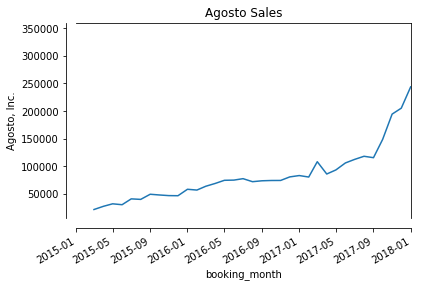

In [887]:
plt.plot(sales)
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.xlabel('booking_month')
plt.ylabel('Agosto, Inc.')
plt.xlim('2015','2018')
plt.title('Agosto Sales');

In [888]:
is_stationary(sales.diff(1).dropna());


adf		 -0.715
p		 0.972
crit. val.	 1%: -4.357, 5%: -3.595, 10%: -3.234
stationary?	 false


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


# Step 1: Removing Stationarity- Decomposing components

In [724]:
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomp = seasonal_decompose(sales, freq=12)

In [725]:
sales_trend = sales_decomp.trend
sales_seasonal = sales_decomp.seasonal
sales_residual = sales_decomp.resid

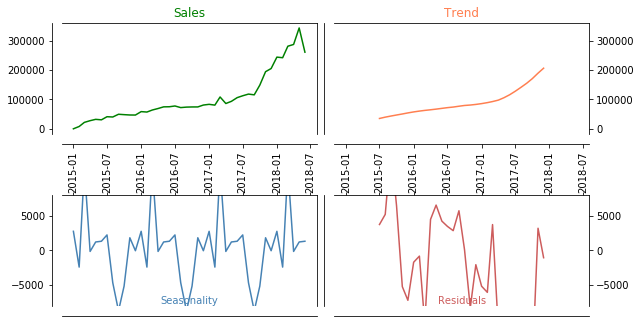

In [726]:
def change_plot(ax):
    despine(ax)
    ax.locator_params(axis='y', nbins=5)
    plt.setp(ax.get_xticklabels(), rotation=90, ha='center')

plt.figure(figsize=(9,4.5))

plt.subplot(221)
plt.plot(sales, color='Green')
change_plot(plt.gca())
plt.title('Sales', color='Green')
xl = plt.xlim()
yl = plt.ylim()

plt.subplot(222)
plt.plot(sales.index,sales_trend, 
         color='Coral')
change_plot(plt.gca())
plt.title('Trend', color='Coral')
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlim(xl)
plt.ylim(yl)

plt.subplot(223)
plt.plot(sales.index,sales_seasonal, 
         color='SteelBlue')
change_plot(plt.gca())
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.xlabel('Seasonality', color='SteelBlue', labelpad=-20)
plt.xlim(xl)
plt.ylim((-8000,8000))

plt.subplot(224)
plt.plot(sales.index,sales_residual,
        color='IndianRed')
change_plot(plt.gca())
plt.xlim(xl)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.ylim((-8000,8000))
plt.xlabel('Residuals', color='IndianRed', labelpad=-20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.55)

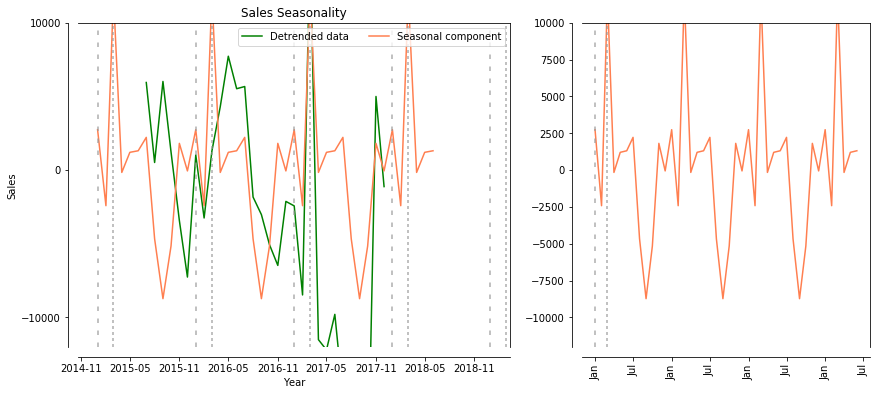

In [727]:
fig = plt.figure(figsize=(10,5) )

ax1 = fig.add_axes([0.1,0.1,0.6,0.9])
ax1.plot(sales-sales_trend, 
         color='Green', label='Detrended data')
ax1.plot(sales_seasonal, 
         color='Coral', label='Seasonal component')
kwrds=dict(lw=1.5, color='0.6', alpha=0.8)
d1 = pd.datetime(2015,1,1)
dd = pd.Timedelta('365 Days')
[ax1.axvline(d1+dd*i, dashes=(3,5),**kwrds) for i in range(5)]
d2 = pd.datetime(2015,3,1)
[ax1.axvline(d2+dd*i, dashes=(2,2),**kwrds) for i in range(5)]
ax1.set_ylim((-12000,10000))

ax1.locator_params(axis='y', nbins=4)
ax1.set_xlabel('Year')
ax1.set_title('Sales Seasonality')
ax1.set_ylabel('Sales')
ax1.legend(loc=0, ncol=2, frameon=True);

ax2 = fig.add_axes([0.8,0.1,0.4,0.9])
ax2.plot(sales_seasonal['2015':'2018'], 
         color='Coral', label='Seasonal component')
ax2.set_ylim((-12000,10000))
[ax2.axvline(d1+dd*i, dashes=(3,5),**kwrds) for i in range(1)]
d2 = pd.datetime(2015,3,1)
[ax2.axvline(d2+dd*i, dashes=(2,2),**kwrds) for i in range(1)]
despine([ax1, ax2])

import matplotlib.dates as mpldates
yrsfmt = mpldates.DateFormatter('%b')
ax2.xaxis.set_major_formatter(yrsfmt)
labels = ax2.get_xticklabels()
plt.setp(labels, rotation=90);

In [728]:
sales_seasonal_component = sales_seasonal['2016'].values
sales_seasonal_component

array([ 2742.59263889, -2418.41027778, 11902.35138889,  -159.39298611,
        1204.77118056,  1311.10347222,  2220.75083333, -4668.24083333,
       -8731.51861111, -5160.34638889,  1813.55708333,   -57.2175    ])

In [729]:
sales_residual.dropna(inplace=True)
is_stationary(sales_residual.dropna());

adf		 -2.059
p		 0.569
crit. val.	 1%: -4.617, 5%: -3.709, 10%: -3.297
stationary?	 false


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


In [730]:
sales_residual

booking_month
2015-07-01     3725.755417
2015-08-01     5183.433750
2015-09-01    14748.751111
2015-10-01     6393.972639
2015-11-01    -5238.598750
2015-12-01    -7207.306667
2016-01-01    -1718.397639
2016-02-01     -834.647639
2016-03-01   -10609.020972
2016-04-01     4460.286319
2016-05-01     6525.326736
2016-06-01     4213.354028
2016-07-01     3452.428750
2016-08-01     2836.685833
2016-09-01     5708.526111
2016-10-01       99.396389
2016-11-01    -8287.577500
2016-12-01    -2070.352917
2017-01-01    -5176.315972
2017-02-01    -6060.065972
2017-03-01     3714.307361
2017-04-01   -11354.999931
2017-05-01   -13420.040347
2017-06-01   -11108.067639
2017-07-01   -17520.254583
2017-08-01   -18362.190000
2017-09-01   -30799.347639
2017-10-01   -16835.439444
2017-11-01     3184.105833
2017-12-01    -1064.410833
Name: monthlybookings, dtype: float64

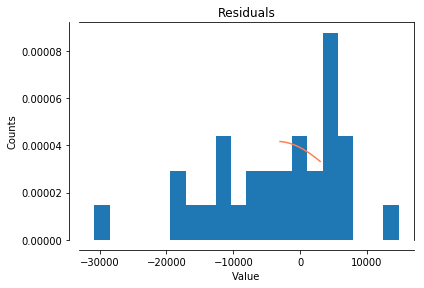

In [731]:
loc, shape = st.norm.fit(sales_residual)
x=range(-3000,3000)
y = st.norm.pdf(x, loc, shape)
n, bins, patches = plt.hist(sales_residual, bins=20, normed=True)
plt.plot(x,y, color='Coral')
despine(plt.gca())
plt.title('Residuals')
plt.xlabel('Value'); plt.ylabel('Counts');

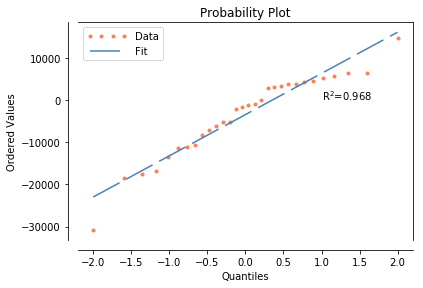

In [732]:
(osm,osr), (slope, intercept, r) = st.probplot(sales_residual, dist='norm', fit=True)
line_func = lambda x: slope*x + intercept
plt.plot(osm,osr,
         '.', label='Data', color='Coral')
plt.plot(osm, line_func(osm), 
         color='SteelBlue',
         dashes=(20,5), label='Fit')
plt.xlabel('Quantiles'); plt.ylabel('Ordered Values')
despine(plt.gca())
plt.text(1, -14, 'R$^2$={0:.3f}'.format(r))
plt.title('Probability Plot')
plt.legend(loc='best', numpoints=4, handlelength=4);

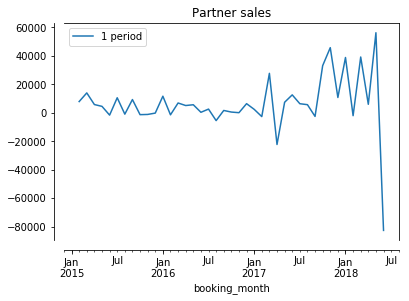

In [733]:
sales.diff(1).plot(label='1 period', title='Partner sales')
plt.legend(loc='best')
despine(plt.gca())

In [734]:
is_stationary(sales.diff(1).dropna());


adf		 -0.596
p		 0.979
crit. val.	 1%: -4.324, 5%: -3.581, 10%: -3.225
stationary?	 false


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,0,'Date')

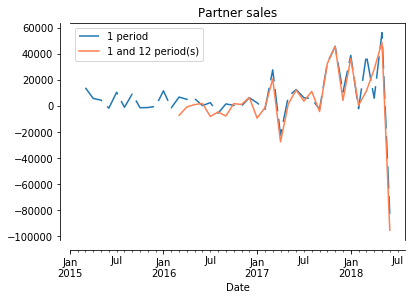

In [701]:
sales.diff(1).plot(label='1 period', title='Partner sales',
                      dashes=(15,5))
sales.diff(1).diff(12).plot(label='1 and 12 period(s)',
                               color='Coral')
plt.legend(loc='best')
despine(plt.gca())
plt.xlabel('Date')

In [702]:
is_stationary(sales.diff(1).diff(12).dropna());


adf		 -0.000
p		 0.994
crit. val.	 1%: -4.728, 5%: -3.757, 10%: -3.323
stationary?	 false


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,0,'Date')

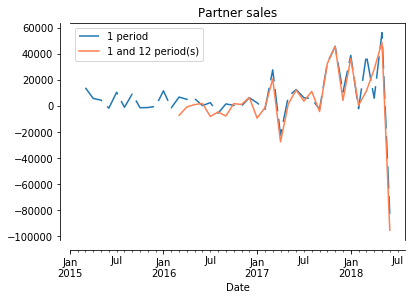

In [703]:
sales.diff(1).plot(label='1 period', title='Partner sales',
                      dashes=(15,5))
sales.diff(1).diff(12).plot(label='1 and 12 period(s)',
                               color='Coral')
plt.legend(loc='best')
despine(plt.gca())
plt.xlabel('Date')

In [704]:
is_stationary(sales.diff(1).diff(12).dropna());


adf		 -0.000
p		 0.994
crit. val.	 1%: -4.728, 5%: -3.757, 10%: -3.323
stationary?	 false


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


# Time series Models

In [705]:
from statsmodels.tsa.arima_model import ARIMA


In [889]:
is_stationary((sales-sales_seasonal).dropna());


adf		 -1.896
p		 0.657
crit. val.	 1%: -4.340, 5%: -3.588, 10%: -3.229
stationary?	 false


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


In [890]:
ts = (sales-sales_seasonal).dropna()
tsdiff = ts.diff(1)

In [891]:
tsdiff

booking_month
2015-03-01             NaN
2015-04-01    17870.934375
2015-05-01     3163.255833
2015-06-01    -1730.472292
2015-07-01     9669.022639
2015-08-01     5949.931667
2015-09-01    13373.827778
2015-10-01    -4870.542222
2015-11-01    -8129.713472
2015-12-01     1664.254583
2016-01-01     8872.299861
2016-02-01     3745.502917
2016-03-01    -7421.441667
2016-04-01    17178.884375
2016-05-01     4302.225833
2016-06-01      253.067708
2016-07-01     1695.762639
2016-08-01     1403.881667
2016-09-01     5708.167778
2016-10-01    -3045.392222
2016-11-01    -6892.263472
2016-12-01     8295.324583
2017-01-01     -359.230139
2017-02-01     2487.512917
2017-03-01    13437.418333
2017-04-01   -10222.135625
2017-05-01     6046.595833
2017-06-01    12510.047708
2017-07-01     5485.972639
2017-08-01    12602.391667
2017-09-01     1512.427778
2017-10-01    29569.387778
2017-11-01    38840.106528
2017-12-01    12637.484583
2018-01-01    36100.639861
2018-02-01     3135.662917
2018-03-01    

In [892]:
is_stationary((sales-sales_seasonal).diff(1).dropna());

adf		 -0.776
p		 0.968
crit. val.	 1%: -4.357, 5%: -3.595, 10%: -3.234
stationary?	 false


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


In [893]:
is_stationary((ts).dropna());


adf		 -1.896
p		 0.657
crit. val.	 1%: -4.340, 5%: -3.588, 10%: -3.229
stationary?	 false


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


In [894]:
is_stationary(ts);


adf		 -1.896
p		 0.657
crit. val.	 1%: -4.340, 5%: -3.588, 10%: -3.229
stationary?	 false


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


In [895]:
ts

booking_month
2015-03-01      9419.818611
2015-04-01     27290.752986
2015-05-01     30454.008819
2015-06-01     28723.536528
2015-07-01     38392.559167
2015-08-01     44342.490833
2015-09-01     57716.318611
2015-10-01     52845.776389
2015-11-01     44716.062917
2015-12-01     46380.317500
2016-01-01     55252.617361
2016-02-01     58998.120278
2016-03-01     51576.678611
2016-04-01     68755.562986
2016-05-01     73057.788819
2016-06-01     73310.856528
2016-07-01     75006.619167
2016-08-01     76410.500833
2016-09-01     82118.668611
2016-10-01     79073.276389
2016-11-01     72181.012917
2016-12-01     80476.337500
2017-01-01     80117.107361
2017-02-01     82604.620278
2017-03-01     96042.038611
2017-04-01     85819.902986
2017-05-01     91866.498819
2017-06-01    104376.546528
2017-07-01    109862.519167
2017-08-01    122464.910833
2017-09-01    123977.338611
2017-10-01    153546.726389
2017-11-01    192386.832917
2017-12-01    205024.317500
2018-01-01    241124.957361
2018-0

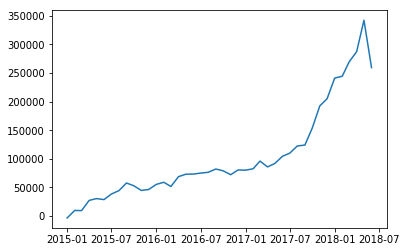

In [676]:
plt.plot(ts) # was tsdiff before this


In [677]:
model = ARIMA(ts, order=(0, 2, 2))  
arres = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


907.3915484816811 914.1470662981368


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


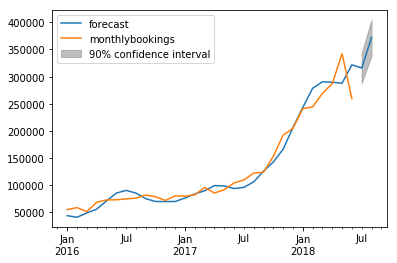

In [678]:
arres.plot_predict(start='2016-01-01', end='2018-08-01', alpha=0.10)
plt.legend(loc='upper left')
print(arres.aic, arres.bic)

In [679]:
model = ARIMA(ts, order=(1, 1, 1))  
mares = model.fit()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

# Selecting p and q

In [896]:
tsa.stattools.arma_order_select_ic(sales, max_ar=5, max_ma=5, ic='aic')


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Converg

{'aic':              0           1           2           3           4           5
 0  1026.683112  987.457836  962.027134  939.315719  952.261180  940.814834
 1   904.872648  906.959337  899.205466  901.143834  897.050076  895.286415
 2   917.300773  907.569587  901.019469  901.387968  902.902168  897.266026
 3   901.155079  890.644948  902.983530         NaN  894.071364  895.279929
 4   903.398761         NaN  893.309479  905.962081  897.902635         NaN
 5   907.037425  895.246150  897.294469  894.746061         NaN  896.584341,
 'aic_min_order': (3, 1)}

In [897]:
tsa.stattools.arma_order_select_ic(sales, max_ar=5, max_ma=5, ic='bic')


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Converg

{'bic':              0           1           2           3           4           5
 0  1030.060871  992.524474  968.782652  947.760116  962.394457  952.636990
 1   922.631770  913.714855  907.649863  911.277111  908.872232  908.797450
 2   924.056291  916.013984  911.152745  913.210124  916.413204  912.465941
 3   909.599476  900.778224  914.805686         NaN  909.271279  912.168723
 4   913.532037         NaN  906.820514  921.161996  914.791430         NaN
 5          NaN  908.757186  912.494384  911.634855         NaN  916.850894,
 'bic_min_order': (3, 1)}

# Selecting p and q using sales_residual.dropna()


In [826]:
tsa.stattools.arma_order_select_ic(sales, max_ar=3, max_ma=3, ic='aic')


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Converg

{'aic':              0            1           2           3
 0  1048.058956  1009.852957  981.385211  968.506011
 1   944.059088   946.626406  942.193563  943.521616
 2   945.280206   952.379718  942.185287  943.296522
 3   935.253880   938.526274         NaN  935.916834, 'aic_min_order': (3, 0)}

In [828]:
tsa.stattools.arma_order_select_ic(sales, max_ar=3, max_ma=3, ic='bic')


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Converg

{'bic':              0            1           2           3
 0  1051.486100  1015.000071  988.239499  977.073871
 1   949.199804   953.480694  950.761423  953.803048
 2   952.134494   960.947578  952.466720  955.291526
 3   944.848448   948.807706         NaN  949.625411, 'bic_min_order': (3, 0)}

# Selecting p and q using sales_residual.dropna()

In [216]:
tsa.stattools.arma_order_select_ic(sales_residual.dropna(), max_ar=3, max_ma=3, ic='aic')


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/anaconda3/lib/pytho

{'aic':             0           1           2           3
 0  639.049678  625.964349  628.128719  626.034945
 1  625.915116  626.487444  651.378124  627.168242
 2  627.699474  625.807760  627.573805  629.005972
 3  628.572023  627.525210  629.175894  627.903831, 'aic_min_order': (2, 1)}

In [380]:
tsa.stattools.arma_order_select_ic(sales_residual.dropna(), max_ar=3, max_ma=3, ic='bic')


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/anaconda3/

{'bic':             0           1           2           3
 0  642.110507  628.097276  631.489509  632.103151
 1  630.084722  631.482149         NaN  635.199661
 2  633.040679  632.034639         NaN  637.550390
 3  635.637822  635.229887  638.345368  639.043058, 'bic_min_order': (0, 1)}

In [822]:
acf = stt.acf(sales, nlags=5)
pacf = stt.pacf(sales, nlags=5)

In [823]:
y=-1.96/np.sqrt(len(sales))
y

-0.3061005733016679

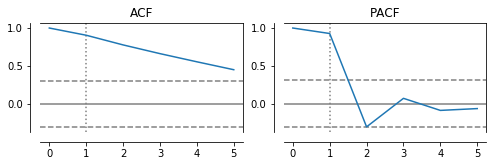

In [824]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,2))
ax1.axhline(y=0,color='gray')
ax1.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax1.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax1.axvline(x=1,ls=':',color='gray')
ax1.plot(acf)
ax1.set_title('ACF')

ax2.axhline(y=0,color='gray')
ax2.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax2.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
ax2.axvline(x=1,ls=':',color='gray')
ax2.plot(pacf)
ax2.set_title('PACF')

despine([ax1,ax2])

In [898]:
sales

booking_month
2015-03-01     21322.17
2015-04-01     27131.36
2015-05-01     31658.78
2015-06-01     30034.64
2015-07-01     40613.31
2015-08-01     39674.25
2015-09-01     48984.80
2015-10-01     47685.43
2015-11-01     46529.62
2015-12-01     46323.10
2016-01-01     57995.21
2016-02-01     56579.71
2016-03-01     63479.03
2016-04-01     68596.17
2016-05-01     74262.56
2016-06-01     74621.96
2016-07-01     77227.37
2016-08-01     71742.26
2016-09-01     73387.15
2016-10-01     73912.93
2016-11-01     73994.57
2016-12-01     80419.12
2017-01-01     82859.70
2017-02-01     80186.21
2017-03-01    107944.39
2017-04-01     85660.51
2017-05-01     93071.27
2017-06-01    105687.65
2017-07-01    112083.27
2017-08-01    117796.67
2017-09-01    115245.82
2017-10-01    148386.38
2017-11-01    194200.39
2017-12-01    204967.10
2018-01-01    243867.55
2018-02-01    241842.21
2018-03-01    281078.44
2018-04-01    287057.97
2018-05-01    343367.28
2018-06-01    343913.50
Name: monthlybookings, dty

# Autoregressive Integrated Moving Average – ARIMA


In [899]:
model = ARIMA(sales, order=(0,1,1))  
arimares = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


867.9121351463532 872.9028200847422


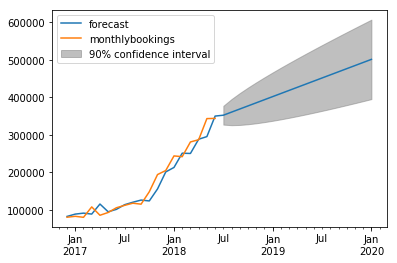

In [900]:
arimares.plot_predict(start='2016-12-01', end='2020-01-01', alpha=.10)
plt.legend(loc='upper left');
print(arimares.aic, arimares.bic)

In [901]:
arimares.predict(start='2016-12-01', end='2020-01-01',typ='levels')

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


2016-12-01     82536.937139
2017-01-01     88758.597266
2017-02-01     91320.412055
2017-03-01     88814.784425
2017-04-01    115602.599818
2017-05-01     94892.131762
2017-06-01    101401.225827
2017-07-01    113821.784660
2017-08-01    120410.585488
2017-09-01    126152.053932
2017-10-01    123867.084961
2017-11-01    155871.777330
2017-12-01    201243.011812
2018-01-01    213119.265139
2018-02-01    251153.223906
2018-03-01    250412.326571
2018-04-01    288366.748613
2018-05-01    295371.506632
2018-06-01    350099.938482
2018-07-01    352383.431642
2018-08-01    360655.004207
2018-09-01    368926.576772
2018-10-01    377198.149337
2018-11-01    385469.721902
2018-12-01    393741.294467
2019-01-01    402012.867033
2019-02-01    410284.439598
2019-03-01    418556.012163
2019-04-01    426827.584728
2019-05-01    435099.157293
2019-06-01    443370.729858
2019-07-01    451642.302423
2019-08-01    459913.874988
2019-09-01    468185.447553
2019-10-01    476457.020118
2019-11-01    484728

In [902]:
model_1predictions= arimares.predict(start='2016-12-01', end='2020-01-01',typ='levels')

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [903]:
forecast_accuracy=(((((sales - model_1predictions) / sales) * 100).abs())-100).abs()
forecast_accuracy['2016-12-01':'2018-06-01']

2016-12-01    97.366525
2017-01-01    92.880861
2017-02-01    86.114568
2017-03-01    82.278277
2017-04-01    65.045632
2017-05-01    98.043583
2017-06-01    95.944253
2017-07-01    98.448908
2017-08-01    97.780994
2017-09-01    90.536547
2017-10-01    83.476047
2017-11-01    80.263370
2017-12-01    98.183080
2018-01-01    87.391400
2018-02-01    96.149963
2018-03-01    89.089838
2018-04-01    99.544072
2018-05-01    86.022031
2018-06-01    98.201164
dtype: float64

In [904]:
model = ARIMA(sales, order=(0,2,1))  
arimares = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


842.7001501258965 847.6129086050756


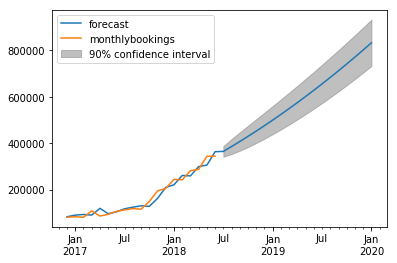

In [905]:
arimares.plot_predict(start='2016-12-01', end='2020-01-01', alpha=.10)
plt.legend(loc='upper left');
print(arimares.aic, arimares.bic)

In [906]:
arimares.predict(start='2016-12-01', end='2020-01-01',typ='levels')

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


2016-12-01     82768.543502
2017-01-01     89666.011764
2017-02-01     92382.009528
2017-03-01     89763.062947
2017-04-01    118863.593812
2017-05-01     95836.386031
2017-06-01    103725.590986
2017-07-01    116999.435410
2017-08-01    123804.273646
2017-09-01    129895.310471
2017-10-01    127440.939694
2017-11-01    161841.954630
2017-12-01    209251.961307
2018-01-01    220473.622597
2018-02-01    260646.924857
2018-03-01    258669.102861
2018-04-01    299112.610020
2018-05-01    305351.134510
2018-06-01    363245.664963
2018-07-01    364376.680535
2018-08-01    385424.656641
2018-09-01    407057.428318
2018-10-01    429274.995568
2018-11-01    452077.358389
2018-12-01    475464.516782
2019-01-01    499436.470746
2019-02-01    523993.220282
2019-03-01    549134.765390
2019-04-01    574861.106069
2019-05-01    601172.242320
2019-06-01    628068.174143
2019-07-01    655548.901537
2019-08-01    683614.424503
2019-09-01    712264.743040
2019-10-01    741499.857149
2019-11-01    771319

In [907]:
model_2predictions= arimares.predict(start='2016-12-01', end='2020-01-01',typ='levels')

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [908]:
forecast_accuracy2=(((((sales - model_2predictions) / sales) * 100).abs())-100).abs()
forecast_accuracy2['2016-12-01':'2018-06-01']

2016-12-01    97.078526
2017-01-01    91.785739
2017-02-01    84.790652
2017-03-01    83.156765
2017-04-01    61.238751
2017-05-01    97.029034
2017-06-01    98.143530
2017-07-01    95.613828
2017-08-01    94.900023
2017-09-01    87.288484
2017-10-01    85.884526
2017-11-01    83.337605
2017-12-01    97.909488
2018-01-01    90.407118
2018-02-01    92.224387
2018-03-01    92.027372
2018-04-01    95.800625
2018-05-01    88.928431
2018-06-01    94.378771
dtype: float64

In [909]:
model = ARIMA(sales, order=(0,1,4))  
arimares = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


861.033995555507 871.0153654322849


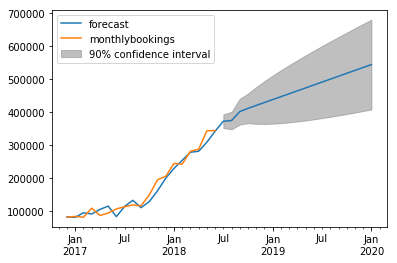

In [910]:
arimares.plot_predict(start='2016-12-01', end='2020-01-01', alpha=.10)
plt.legend(loc='upper left');
print(arimares.aic, arimares.bic)

In [911]:
arimares.predict(start='2016-12-01', end='2020-01-01',typ='levels')

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


2016-12-01     81604.162837
2017-01-01     80082.207503
2017-02-01     93925.868258
2017-03-01     90304.052270
2017-04-01    103982.915119
2017-05-01    114180.339855
2017-06-01     82179.180339
2017-07-01    113360.844834
2017-08-01    131759.610081
2017-09-01    109509.664533
2017-10-01    128098.509838
2017-11-01    160602.769213
2017-12-01    199079.671716
2018-01-01    228761.422480
2018-02-01    253408.356053
2018-03-01    277990.913716
2018-04-01    280947.331342
2018-05-01    308536.197060
2018-06-01    341947.241669
2018-07-01    372340.254674
2018-08-01    374349.390699
2018-09-01    401504.703694
2018-10-01    411451.979808
2018-11-01    420331.453703
2018-12-01    429210.927599
2019-01-01    438090.401494
2019-02-01    446969.875389
2019-03-01    455849.349284
2019-04-01    464728.823179
2019-05-01    473608.297074
2019-06-01    482487.770969
2019-07-01    491367.244864
2019-08-01    500246.718759
2019-09-01    509126.192654
2019-10-01    518005.666549
2019-11-01    526885

In [912]:
model_3predictions=arimares.predict(start='2016-12-01', end='2020-01-01',typ='levels')
model_3predictions

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


2016-12-01     81604.162837
2017-01-01     80082.207503
2017-02-01     93925.868258
2017-03-01     90304.052270
2017-04-01    103982.915119
2017-05-01    114180.339855
2017-06-01     82179.180339
2017-07-01    113360.844834
2017-08-01    131759.610081
2017-09-01    109509.664533
2017-10-01    128098.509838
2017-11-01    160602.769213
2017-12-01    199079.671716
2018-01-01    228761.422480
2018-02-01    253408.356053
2018-03-01    277990.913716
2018-04-01    280947.331342
2018-05-01    308536.197060
2018-06-01    341947.241669
2018-07-01    372340.254674
2018-08-01    374349.390699
2018-09-01    401504.703694
2018-10-01    411451.979808
2018-11-01    420331.453703
2018-12-01    429210.927599
2019-01-01    438090.401494
2019-02-01    446969.875389
2019-03-01    455849.349284
2019-04-01    464728.823179
2019-05-01    473608.297074
2019-06-01    482487.770969
2019-07-01    491367.244864
2019-08-01    500246.718759
2019-09-01    509126.192654
2019-10-01    518005.666549
2019-11-01    526885

In [913]:
forecast_accuracy3=(((((sales - model_3predictions) / sales) * 100).abs())-100).abs()
forecast_accuracy3['2016-12-01':'2018-06-01']


2016-12-01    98.526417
2017-01-01    96.647957
2017-02-01    82.865310
2017-03-01    83.657939
2017-04-01    78.610441
2017-05-01    77.319457
2017-06-01    77.756654
2017-07-01    98.860156
2017-08-01    88.146575
2017-09-01    95.022678
2017-10-01    86.327674
2017-11-01    82.699509
2017-12-01    97.127623
2018-01-01    93.805602
2018-02-01    95.217482
2018-03-01    98.901543
2018-04-01    97.871288
2018-05-01    89.856027
2018-06-01    99.428270
dtype: float64

# MACHINE LEARNING MASTERY

In [609]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


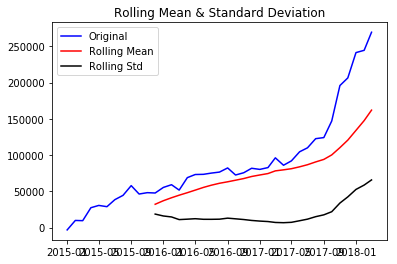

Results of Dickey-Fuller Test:
Test Statistic                  2.562612
p-value                         0.999067
#Lags Used                      0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


In [610]:
test_stationarity(ts)

# Estimating & Eliminating Trend -https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [611]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_excel('ML Trial.xlsx', parse_dates=['booking_month'], index_col='booking_month')
data.head()

,partner_name,monthlybookings,entity_id,partner_object_id,psm,partner_region
booking_month,,,,,,
2015-01-01,"Agosto, Inc.",-571.48,CLe1WQ,a0n60000000sgWAAAY,Leila Araújo,AMER
2015-02-01,"Agosto, Inc.",7332.32,CLe1WQ,a0n60000000sgWAAAY,Leila Araújo,AMER
2015-03-01,"Agosto, Inc.",21322.17,CLe1WQ,a0n60000000sgWAAAY,Leila Araújo,AMER
2015-04-01,"Agosto, Inc.",27131.36,CLe1WQ,a0n60000000sgWAAAY,Leila Araújo,AMER
2015-05-01,"Agosto, Inc.",31658.78,CLe1WQ,a0n60000000sgWAAAY,Leila Araújo,AMER


In [612]:
ts = data['monthlybookings']
ts.head(10)

booking_month
2015-01-01     -571.48
2015-02-01     7332.32
2015-03-01    21322.17
2015-04-01    27131.36
2015-05-01    31658.78
2015-06-01    30034.64
2015-07-01    40613.31
2015-08-01    39674.25
2015-09-01    48984.80
2015-10-01    47685.43
Name: monthlybookings, dtype: float64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


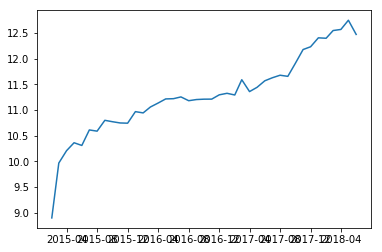

In [613]:
ts_log = np.log(ts)
plt.plot(ts_log)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


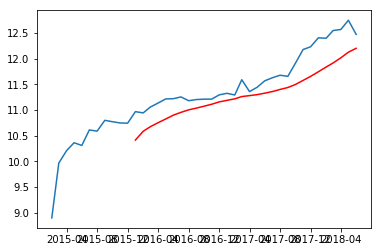

In [614]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [615]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

booking_month
2015-01-01   NaN
2015-02-01   NaN
2015-03-01   NaN
2015-04-01   NaN
2015-05-01   NaN
2015-06-01   NaN
2015-07-01   NaN
2015-08-01   NaN
2015-09-01   NaN
2015-10-01   NaN
2015-11-01   NaN
2015-12-01   NaN
Name: monthlybookings, dtype: float64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


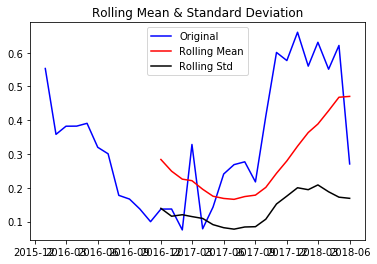

Results of Dickey-Fuller Test:
Test Statistic                 -1.259014
p-value                         0.647709
#Lags Used                      1.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [616]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


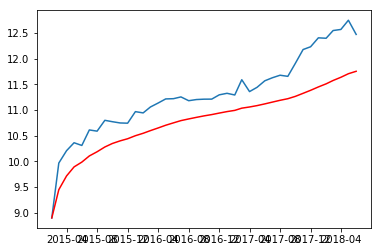

In [617]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


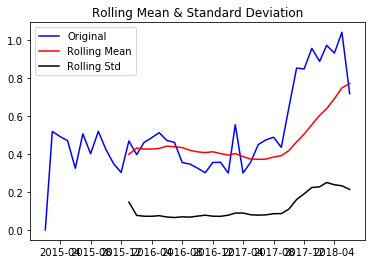

Results of Dickey-Fuller Test:
Test Statistic                 -0.971511
p-value                         0.763513
#Lags Used                      1.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [618]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff.dropna())

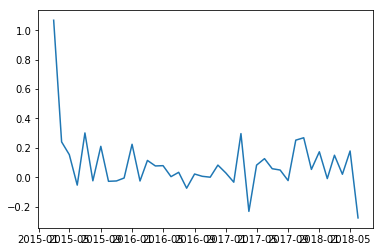

In [619]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


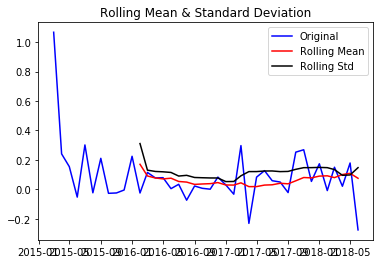

Results of Dickey-Fuller Test:
Test Statistic                -9.494038e+00
p-value                        3.588677e-16
#Lags Used                     0.000000e+00
Number of Observations Used    3.900000e+01
Critical Value (1%)           -3.610400e+00
Critical Value (5%)           -2.939109e+00
Critical Value (10%)          -2.608063e+00
dtype: float64


In [620]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [621]:
ts_log_diff.dropna()

booking_month
2015-03-01    1.067455
2015-04-01    0.240943
2015-05-01    0.154325
2015-06-01   -0.052664
2015-07-01    0.301744
2015-08-01   -0.023393
2015-09-01    0.210808
2015-10-01   -0.026884
2015-11-01   -0.024537
2015-12-01   -0.004448
2016-01-01    0.224720
2016-02-01   -0.024710
2016-03-01    0.115059
2016-04-01    0.077527
2016-05-01    0.079370
2016-06-01    0.004828
2016-07-01    0.034319
2016-08-01   -0.073674
2016-09-01    0.022669
2016-10-01    0.007139
2016-11-01    0.001104
2016-12-01    0.083260
2017-01-01    0.029897
2017-02-01   -0.032797
2017-03-01    0.297265
2017-04-01   -0.231224
2017-05-01    0.082974
2017-06-01    0.127123
2017-07-01    0.058754
2017-08-01    0.049718
2017-09-01   -0.021893
2017-10-01    0.252752
2017-11-01    0.269071
2017-12-01    0.053959
2018-01-01    0.173776
2018-02-01   -0.008340
2018-03-01    0.150348
2018-04-01    0.021050
2018-05-01    0.179116
2018-06-01   -0.275600
Name: monthlybookings, dtype: float64

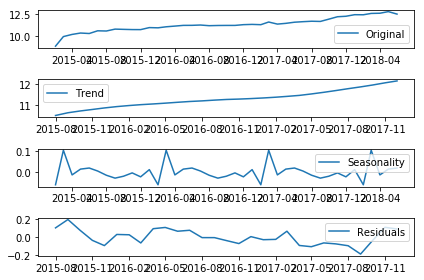

In [622]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.dropna())

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


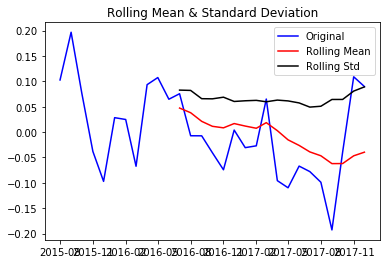

Results of Dickey-Fuller Test:
Test Statistic                 -2.930257
p-value                         0.041941
#Lags Used                      0.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [623]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [624]:
ts_log_decompose

booking_month
2015-08-01    0.102653
2015-09-01    0.196709
2015-10-01    0.076633
2015-11-01   -0.038083
2015-12-01   -0.097113
2016-01-01    0.028404
2016-02-01    0.024809
2016-03-01   -0.067323
2016-04-01    0.093422
2016-05-01    0.107447
2016-06-01    0.064737
2016-07-01    0.075575
2016-08-01   -0.007224
2016-09-01   -0.007360
2016-10-01   -0.040686
2016-11-01   -0.074252
2016-12-01    0.003962
2017-01-01   -0.030668
2017-02-01   -0.027073
2017-03-01    0.065059
2017-04-01   -0.095686
2017-05-01   -0.109711
2017-06-01   -0.067001
2017-07-01   -0.077839
2017-08-01   -0.098826
2017-09-01   -0.192746
2017-10-01   -0.039344
2017-11-01    0.108939
2017-12-01    0.089755
Name: monthlybookings, dtype: float64

In [316]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [317]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

In [342]:
lag_acf

array([ 1.        , -0.03705714,  0.1060837 , -0.08391331,  0.15592416,
       -0.06807346,  0.07729295, -0.15450045, -0.06066834, -0.02484539,
        0.11543743, -0.07021682,  0.02794065, -0.0642747 ,  0.14010157,
       -0.16464372, -0.01164033, -0.06633221, -0.00963057, -0.058429  ,
        0.02383088])

In [343]:
lag_pacf

array([ 1.        , -0.03822457,  0.1595633 , -0.04042343,  0.18566847,
        0.00871482,  0.08586723, -0.15794586, -0.16767764,  0.04248208,
        0.18592816,  0.14463659,  0.03938354, -0.07505268,  0.14484791,
       -0.2873468 , -0.05839967,  0.35316004,  0.22982549,  0.32665184,
       -0.03032612])

Text(0.5,1,'Autocorrelation Function')

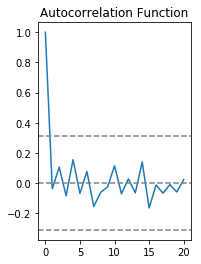

In [318]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

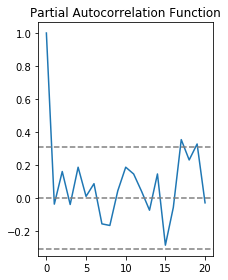

In [319]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [320]:
from statsmodels.tsa.arima_model import ARIMA


# AR MODEL

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 2.0533')

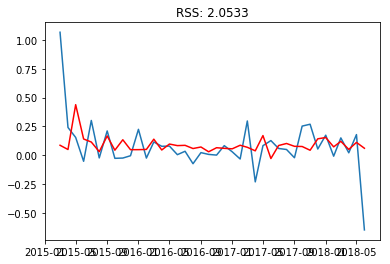

In [323]:
model = ARIMA(ts_log.dropna(), order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# MA Model

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 2.0124')

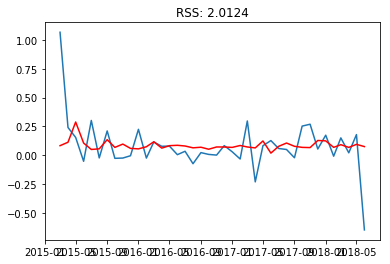

In [325]:
model = ARIMA(ts_log.dropna(), order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# Combined Model

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: nan')

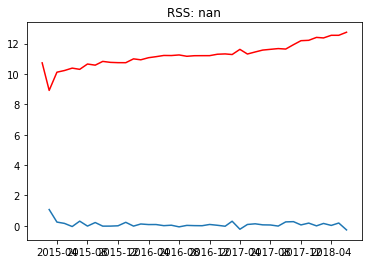

In [625]:
model = ARIMA(ts_log.dropna(), order=(1, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [626]:
tsa.stattools.arma_order_select_ic(ts_log_diff.dropna(), max_ar=3, max_ma=3, ic='aic')


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/anaconda3/lib/python3.6/si

{'aic':            0          1         2         3
 0 -11.058289  -9.092178 -8.089068 -6.360581
 1  -9.115151 -11.153995 -9.873224 -8.019961
 2  -8.863784  -9.992080 -8.305167 -6.305401
 3  -7.194397        NaN  0.417880 -7.967796, 'aic_min_order': (1, 1)}

In [627]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()


booking_month
2015-02-01    10.732480
2015-03-01     8.917349
2015-04-01    10.117155
2015-05-01    10.227144
2015-06-01    10.385668
dtype: float64

In [628]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA_diff_cumsum.head()

booking_month
2015-02-01    10.732480
2015-03-01    19.649829
2015-04-01    29.766984
2015-05-01    39.994128
2015-06-01    50.379796
dtype: float64

In [629]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


booking_month
2015-01-01          NaN
2015-02-01    10.732480
2015-03-01    19.649829
2015-04-01    29.766984
2015-05-01    39.994128
dtype: float64

In [630]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA

booking_month
2015-01-01              NaN
2015-02-01     4.582021e+04
2015-03-01     3.418318e+08
2015-04-01     8.465196e+12
2015-05-01     2.340072e+17
2015-06-01     7.579969e+21
2015-07-01     2.264709e+26
2015-08-01     9.604401e+30
2015-09-01     3.782536e+35
2015-10-01     1.907240e+40
2015-11-01     9.021570e+44
2015-12-01     4.187532e+49
2016-01-01     1.939007e+54
2016-02-01     1.156292e+59
2016-03-01     6.479227e+63
2016-04-01     4.167169e+68
2016-05-01     2.869841e+73
2016-06-01     2.140831e+78
2016-07-01     1.588312e+83
2016-08-01     1.225658e+88
2016-09-01     8.659709e+92
2016-10-01     6.352189e+97
2016-11-01    4.673159e+102
2016-12-01    3.440837e+107
2017-01-01    2.781768e+112
2017-02-01    2.296380e+117
2017-03-01    1.821872e+122
2017-04-01    2.029955e+127
2017-05-01    1.665183e+132
2017-06-01    1.563396e+137
2017-07-01    1.662486e+142
2017-08-01    1.856809e+147
2017-09-01    2.178449e+152
2017-10-01    2.477004e+157
2017-11-01    3.758109e+162
2017-1

Text(0.5,1,'RMSE: nan')

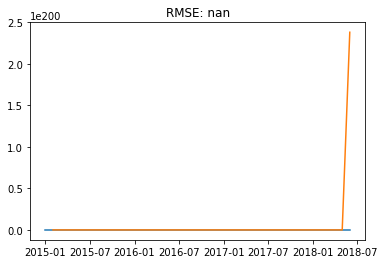

In [631]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))